<center>
  <img src="https://www.inteli.edu.br/wp-content/uploads/2022/04/28103439/Logo-Container.png" />
</center>

## Carregamento dos Dados

Nesta etapa, vamos importar bibliotecas necessárias e carregar os dados do arquivo CSV para análise.

# `[SI10-2024-P1]` - Prova Prática

Sistemas de Informação - Módulo 10 - Turma 4



**Nome**: *Escreva seu nome aqui.*

## Informações Básicas do Dataset

Aqui verificamos o tamanho do dataset, tipos de dados e valores ausentes.

**ANTES DE PROSSEGUIR FAÇA UMA CÓPIA DESTE NOTEBOOK**

----

## Contexto

## Estatísticas Descritivas

Vamos observar as estatísticas básicas das variáveis numéricas, como média, desvio padrão e quartis.

Uma plataforma online, que atua na venda de produtos, deseja otimizar sua interface para melhorar a experiência do usuário e aumentar as taxas de conversão. Recentemente, a empresa implementou um redesign de sua página web, e os registros dessa mudança estão detalhados nos dados coletados desde então. As variáveis registradas diariamente incluem o número de visitantes únicos, sessões, taxa de rejeição, páginas por sessão, principais origens do tráfego, tipos de dispositivos usados, eventos ocorridos, taxa de conversão e o tempo médio de sessão.

Com base nesses dados, a empresa considera realizar uma mudança similar para otimizar ainda mais sua plataforma. Antes de proceder, a equipe deseja empregar simulações de Monte Carlo para avaliar os possíveis impactos de um novo redesign na taxa de conversão, tempo médio de sessão e taxa de rejeição, utilizando análises estatísticas para prever tendências futuras e ajustar estratégias de maneira informada. Essa abordagem visa garantir que as decisões tomadas maximizem as taxas de conversões, fundamentais para o sucesso contínuo da plataforma.

## Limpeza e Conversão de Dados

Algumas colunas precisam ser convertidas para formatos numéricos, e possíveis problemas com dados ausentes ou inválidos serão tratados.

In [1]:
!pip install networkx

## Importação do dataset e das bibliotecas

In [2]:
# Importação do dataset
# https://drive.google.com/file/d/1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr/view?usp=drive_link
!gdown 1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr

Downloading...
From: https://drive.google.com/uc?id=1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr
To: c:\Users\Inteli\Downloads\prova\prova\ITL-SI10-2024-P1-dataset.csv

  0%|          | 0.00/7.03k [00:00<?, ?B/s]
100%|██████████| 7.03k/7.03k [00:00<00:00, 25.2MB/s]


In [3]:
# Importação das bibliotecas
import pandas as pd

# Transforma o dataset em DataFrame Pandas
df = pd.read_csv('ITL-SI10-2024-P1-dataset.csv')
print(df.head())
# Correção de tipos de dados
df['Data'] = pd.to_datetime(df['Data'])
numeric_cols = ['Visitantes Únicos', 'Sessões', 'Taxa de Rejeição (%)',
                'Páginas por Sessão', 'Eventos', 'Taxa de Conversão (%)',
                'Tempo Médio de Sessão (minutos)']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


         Data  Visitantes Únicos  Sessões  Taxa de Rejeição (%)  \
0  2023-01-01              113.0    126.0             50.496714   
1  2023-01-02               90.0    157.0             49.438007   
2  2023-01-03               92.0    185.0             49.800231   
3  2023-01-04              130.0    206.0             50.251843   
4  2023-01-05              123.0    155.0             48.070931   

   Páginas por Sessão Principais Origens do Tráfego Dispositivos  Eventos  \
0            1.834201                        Direto      Desktop        8   
1            1.955760                        Social      Desktop        5   
2            2.285052                        Direto      Desktop        9   
3            2.325464                          Pago       Mobile        6   
4            2.267006                        Direto      Desktop        6   

   Taxa de Conversão (%)  Tempo Médio de Sessão (minutos)  
0               1.952083                         5.395516  
1             

## Visualizações Iniciais

Vamos criar gráficos para entender melhor a distribuição dos dados e o comportamento das variáveis.

In [4]:
from enviar_prova.ChartGenerator import ChartGenerator
# instantiate once for the main DataFrame
cg = ChartGenerator(df)

## Questões

### Questão 1

**Análise Exploratória de Dados**: Faça a exploração dos dados, utilizando gráficos interativos. Identifique correlações entre as variáveis e apresente essas relações em uma matriz de correlação focada nas variáveis mais relevantes para a conversão de vendas.

(<Figure size 640x480 with 1 Axes>, <Axes: ylabel='Valores'>)

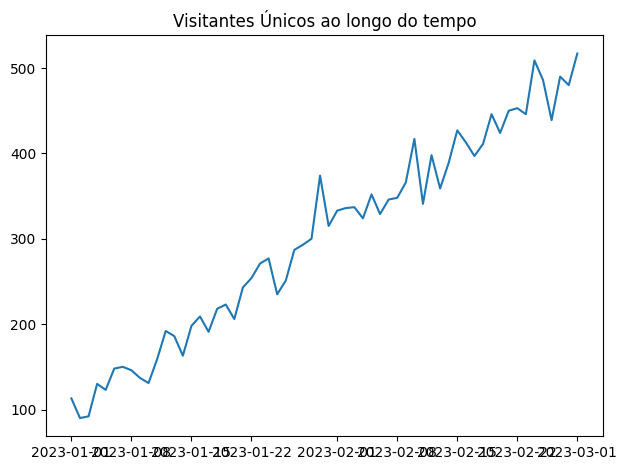

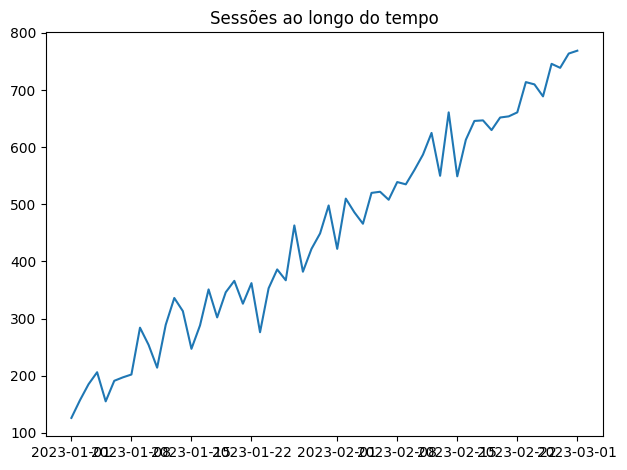

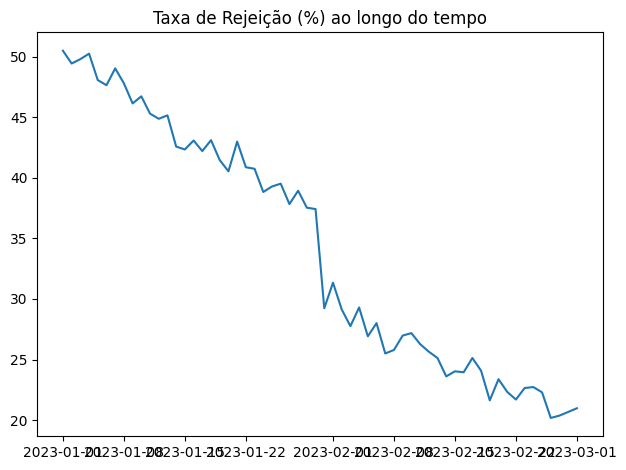

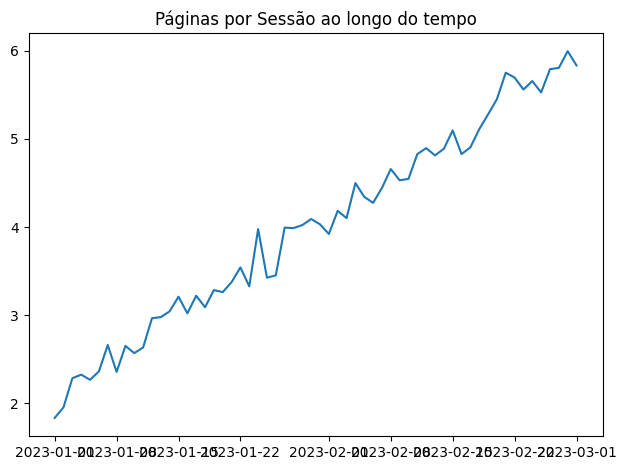

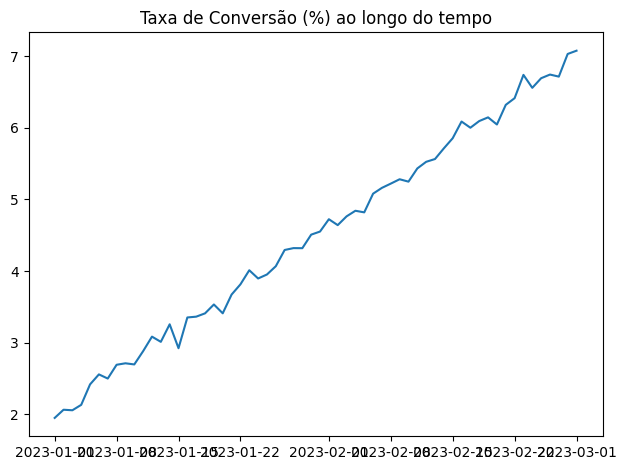

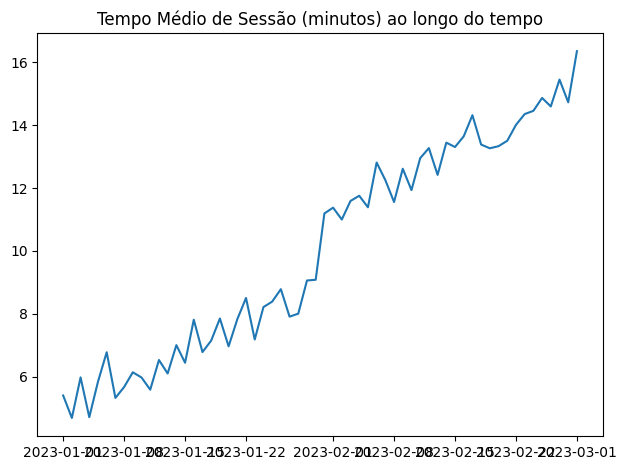

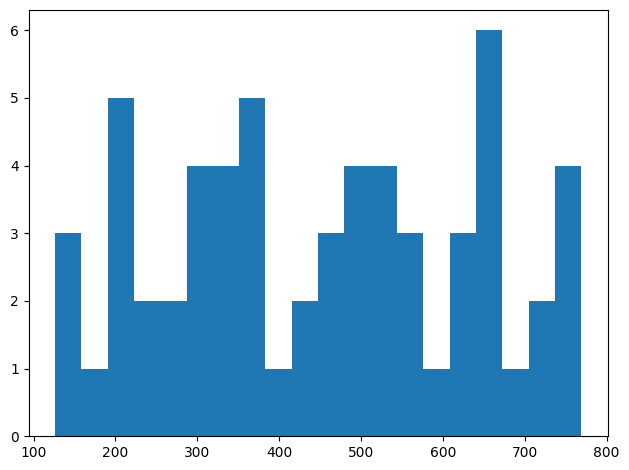

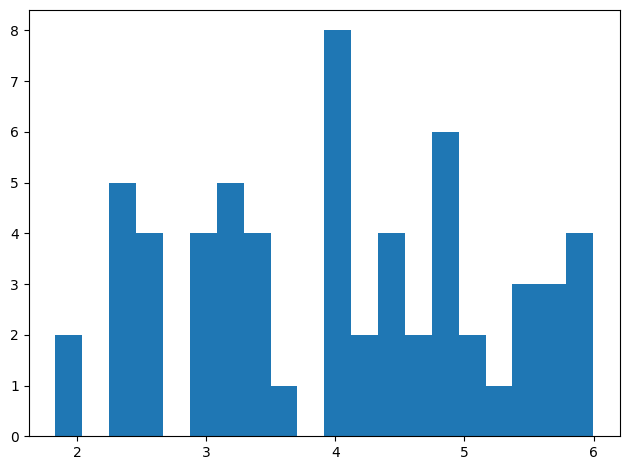

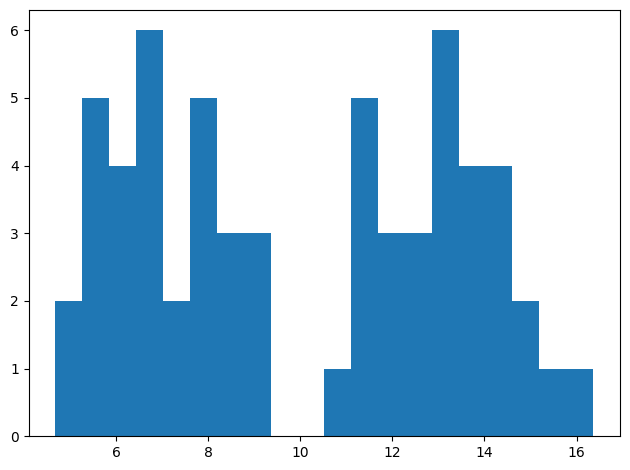

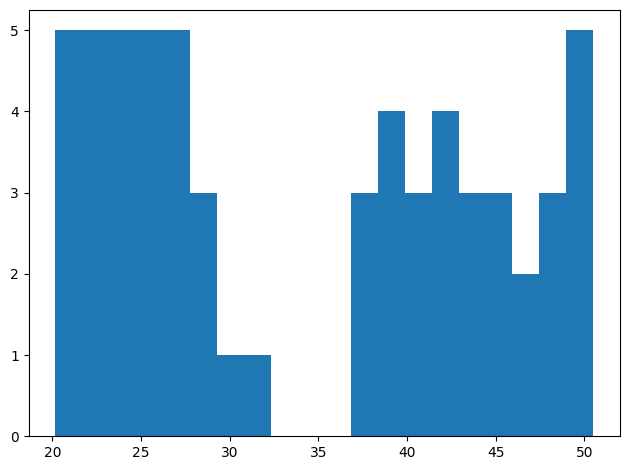

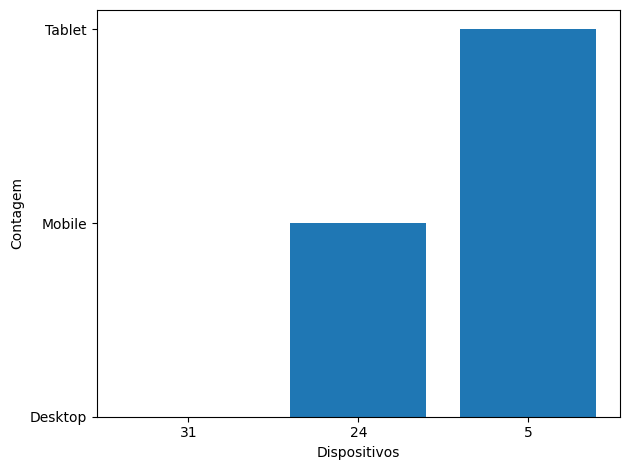

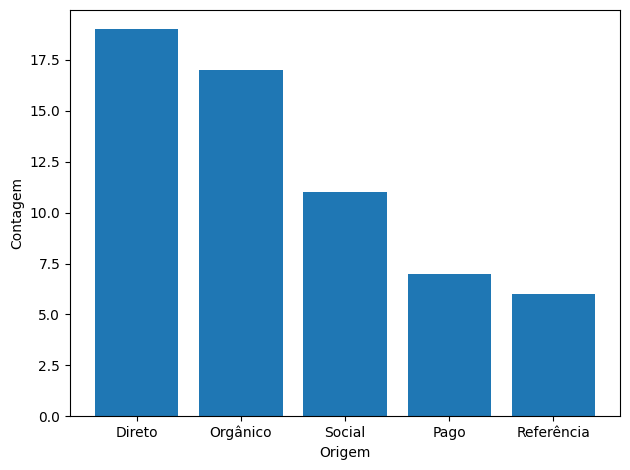

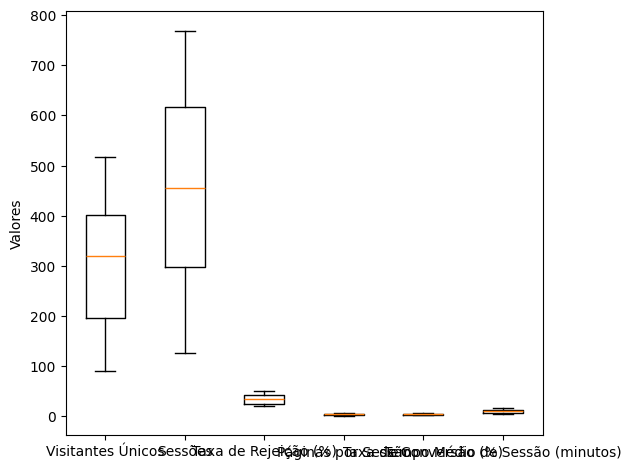

In [5]:
# Análise Exploratória de Dados (com instância cg)
kpis = ['Visitantes Únicos', 'Sessões', 'Taxa de Rejeição (%)',
    'Páginas por Sessão', 'Taxa de Conversão (%)', 'Tempo Médio de Sessão (minutos)']
for m in kpis:
    # para cada métrica, instanciar em um DF reduzido
    cg_sub = ChartGenerator(df[[m, 'Data']].copy())
    cg_sub.line_chart('Data', m, title=f'{m} ao longo do tempo')

# 2. Distribuições
for col in ['Sessões', 'Páginas por Sessão', 'Tempo Médio de Sessão (minutos)', 'Taxa de Rejeição (%)']:
    cg.histogram(col, bins=20)

# 3. Segmentação por dispositivo
# Segmentação por dispositivo
# Agrupa e conta a quantidade de registros por tipo de dispositivo
device_counts = (
    df['Dispositivos']
    .value_counts()
    .reset_index()
    .rename(columns={'index': 'Dispositivo', 'Dispositivos': 'Dispositivos'})
)
cg_dev = ChartGenerator(device_counts)
cg_dev.bar_chart('count', 'Dispositivos', xlabel='Dispositivos', ylabel='Contagem')

# 4. Segmentação por origem de tráfego
traffic_counts = (
    df['Principais Origens do Tráfego']
    .value_counts()
    .reset_index()
    .rename(columns={'index':'Origem','count':'Contagem'})
)
cg_trf = ChartGenerator(traffic_counts)
cg_trf.bar_chart('Principais Origens do Tráfego', 'Contagem', xlabel='Origem', ylabel='Contagem')

# 5. Boxplot de todas as métricas numéricas
numeric_cols = ['Visitantes Únicos', 'Sessões', 'Taxa de Rejeição (%)',
                'Páginas por Sessão', 'Taxa de Conversão (%)', 'Tempo Médio de Sessão (minutos)']
cg.box_plot(numeric_cols, ylabel='Valores')

**Resumo Análise Exploratória de Dados:**  
- Séries temporais mostram tendências e picos, indicando oportunidades de campanhas.  
- Distribuições indicam alta variabilidade em sessões e tempo médio, sugerindo diferentes grupos de usuários.  
- Segmentação revela prevalência de mobile, sugerindo foco em otimização para dispositivos móveis.  
- Principais origens de tráfego (sociais e orgânico) são canais-chave para melhorias de UX.  
- Outliers em bounce rate destacam páginas que precisam de atenção para reduzir rejeição.

### Questão 2

Z-scores (primeiros 10): [ 0.40896649 -0.87341302  1.57295928 -0.88333331 -0.70071552  0.85992737
  0.78878318 -1.21574969 -1.96654483 -0.1050126 ]
T-test: estatístico t = -0.2967, p-valor = 0.7667
Chi-squared: estatístico χ² = 18.8886, p-valor = 0.0262


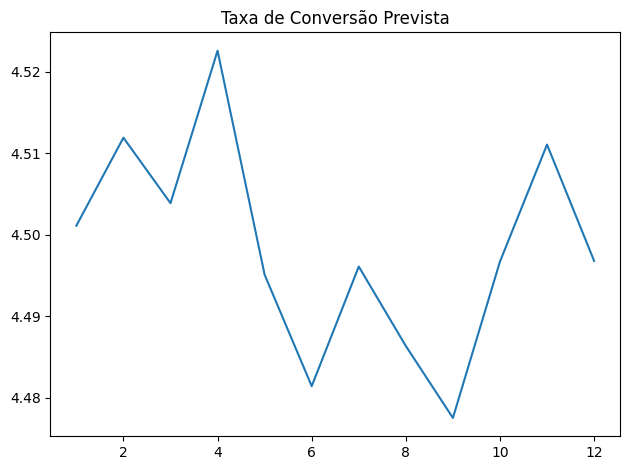

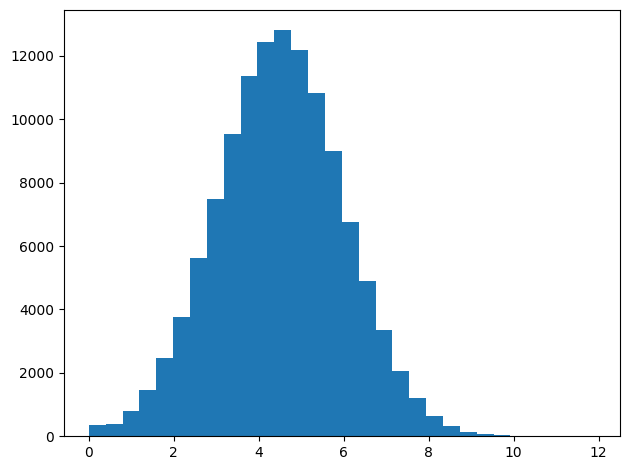

In [6]:
# Simulação de Monte Carlo para Taxa de Conversão
import numpy as np
import pandas as pd
from scipy import stats

# Histórico de conversão (%)
historical = df['Taxa de Conversão (%)']
mean = historical.mean()
std = historical.std()

# Simular 10000 cenários para os próximos 12 períodos
simulations = np.random.normal(loc=mean, scale=std, size=(10000, 12))
simulations = np.clip(simulations, 0, 100)

# Taxa de conversão esperada por período
expected = simulations.mean(axis=0)
meses = list(range(1, 13))
df_mc = pd.DataFrame({'Taxa de Conversão Prevista (%)': expected, 'Período': meses})

# Visualizar resultados da simulação
cg_mc = ChartGenerator(df_mc)
cg_mc.line_chart('Período', 'Taxa de Conversão Prevista (%)', title='Taxa de Conversão Prevista')
sim_df = pd.DataFrame({'Taxa de Conversão Simulada (%)': simulations.flatten()})
cg_sim = ChartGenerator(sim_df)
cg_sim.histogram('Taxa de Conversão Simulada (%)', bins=30)

# Z-scores das taxas simuladas
sim_flat = simulations.flatten()
z_scores = stats.zscore(sim_flat)
print('Z-scores (primeiros 10):', z_scores[:10])

# Teste t de Student (one-sample)
t_stat, t_p = stats.ttest_1samp(sim_flat, popmean=mean)
print(f'T-test: estatístico t = {t_stat:.4f}, p-valor = {t_p:.4f}')

# Teste Qui-Quadrado (goodness-of-fit vs normal)
obs_freq, bins = np.histogram(sim_flat, bins=10)
cdf_vals = stats.norm.cdf(bins, loc=mean, scale=std)
exp_freq = np.diff(cdf_vals) * len(sim_flat)
# Ajuste: garante que sum(exp_freq) == sum(obs_freq)
exp_freq = exp_freq * (obs_freq.sum() / exp_freq.sum())
chi2_stat, chi2_p = stats.chisquare(obs_freq, f_exp=exp_freq)
print(f'Chi-squared: estatístico χ² = {chi2_stat:.4f}, p-valor = {chi2_p:.4f}')

**Resumo Simulação de Monte Carlo:**  
- Simulação sugere taxa de conversão estável em torno da média histórica, com variação moderada nos novos períodos.  
- Distribuição das taxas simuladas mostra cenários extremos que ajudam no planejamento de UX robusto.

## Análise de Correlação

Aqui observamos a correlação entre as variáveis numéricas usando um mapa de calor (heatmap).

In [7]:
# Escreva sua resposta nesta seção (Você pode criar quantas células de texto e de código forem necessárias)

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Sensibilidade Bounce Rate vs Conversão'}>)

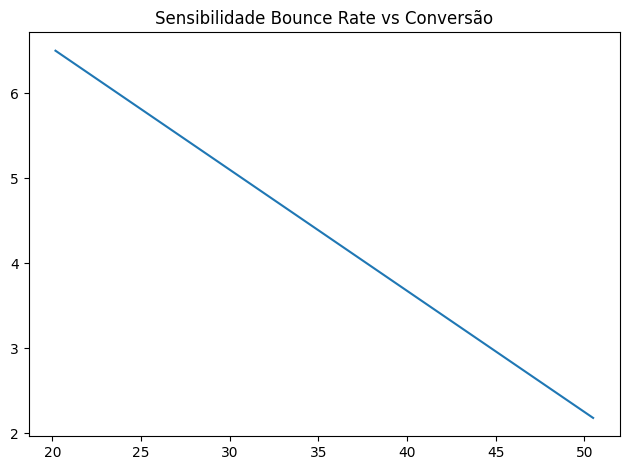

In [8]:
# Análise de Sensibilidade entre Bounce Rate e Conversão
import numpy as np

# Relação histórica
x = df['Taxa de Rejeição (%)']
y = df['Taxa de Conversão (%)']
slope, intercept = np.polyfit(x, y, 1)

# Cenários de redução de bounce rate
bounce_range = np.linspace(x.min(), x.max(), 50)
predicted_conv = intercept + slope * bounce_range
df_sens = pd.DataFrame({'Taxa de Rejeição (%)': bounce_range, 'Taxa de Conversão Prevista (%)': predicted_conv})

# Plotar análise de sensibilidade
cg_sens = ChartGenerator(df_sens)
cg_sens.line_chart(
     'Taxa de Rejeição (%)',
     'Taxa de Conversão Prevista (%)',
     title='Sensibilidade Bounce Rate vs Conversão'
 )

## Análises de Conversão por Dispositivo

Neste passo, investigamos como diferentes dispositivos influenciam a taxa de conversão.

**Resumo Análise de Sensibilidade:**  
- Reduções na Taxa de Rejeição tendem a aumentar a Taxa de Conversão, destacando a importância de melhorias de UX que diminuam o bounce rate.  
- Gráfico de sensibilidade ajuda a priorizar ações de design com maior impacto na conversão.

**Análise de Sensibilidade**: Realize uma análise de sensibilidade para examinar como alterações em diferentes variáveis de entrada afetam as previsões da taxa de conversão.

In [9]:
# Escreva sua resposta nesta seção (Você pode criar quantas células de texto e de código forem necessárias)

## Entrega

## Conclusão Parcial

Aqui sintetizamos observações relevantes feitas até o momento.

Siga esses passos para entregar sua prova.

1. Crie um repositório no GitHub para essa entrega.

2. Submeta seu desenvolvimento neste repositório.

3. Garanta que o repositório é publicamente acessível (eliminatório).

4. No Google forms da prova, submeta a URL do repositório.

## Análise de Cadeia de Markov

Nesta seção, vamos utilizar a coluna **"Principais Origens do Tráfego"** para criar uma **matriz de transição de Markov**.  
Isso nos permite entender a probabilidade de um visitante mudar de uma origem de tráfego para outra ao longo do tempo (por exemplo, de "Direto" para "Orgânico").

Como nossos dados são agregados por dia, simularemos a sequência de origens ordenando pelo tempo (coluna "Data").

In [10]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Garantir ordenação por tempo
df = df.sort_values("Data")

# Extrair sequência de estados
origens = df["Principais Origens do Tráfego"].dropna().tolist()

# Criar pares consecutivos para transições
transicoes = list(zip(origens[:-1], origens[1:]))

# Criar dicionário de contagem de transições
trans_counts = {}
for (origem, destino) in transicoes:
    if origem not in trans_counts:
        trans_counts[origem] = {}
    if destino not in trans_counts[origem]:
        trans_counts[origem][destino] = 0
    trans_counts[origem][destino] += 1

# Criar matriz de transição normalizada
estados = sorted(set(origens))
matriz_transicao = pd.DataFrame(0, index=estados, columns=estados, dtype=float)

for origem in trans_counts:
    total = sum(trans_counts[origem].values())
    for destino in trans_counts[origem]:
        matriz_transicao.loc[origem, destino] = trans_counts[origem][destino] / total

matriz_transicao

,Direto,Orgânico,Pago,Referência,Social
Direto,0.277778,0.222222,0.166667,0.222222,0.111111
Orgânico,0.235294,0.235294,0.117647,0.058824,0.352941
Pago,0.285714,0.285714,0.142857,0.142857,0.142857
Referência,0.166667,0.500000,0.166667,0.000000,0.166667
Social,0.545455,0.363636,0.000000,0.000000,0.090909


## Visualização da Matriz de Transição com Grafo

Abaixo, representamos a matriz de transição de Markov como um **grafo direcionado**.
Cada nó representa uma origem de tráfego, e cada seta (aresta) representa a probabilidade de transição de uma origem para outra.

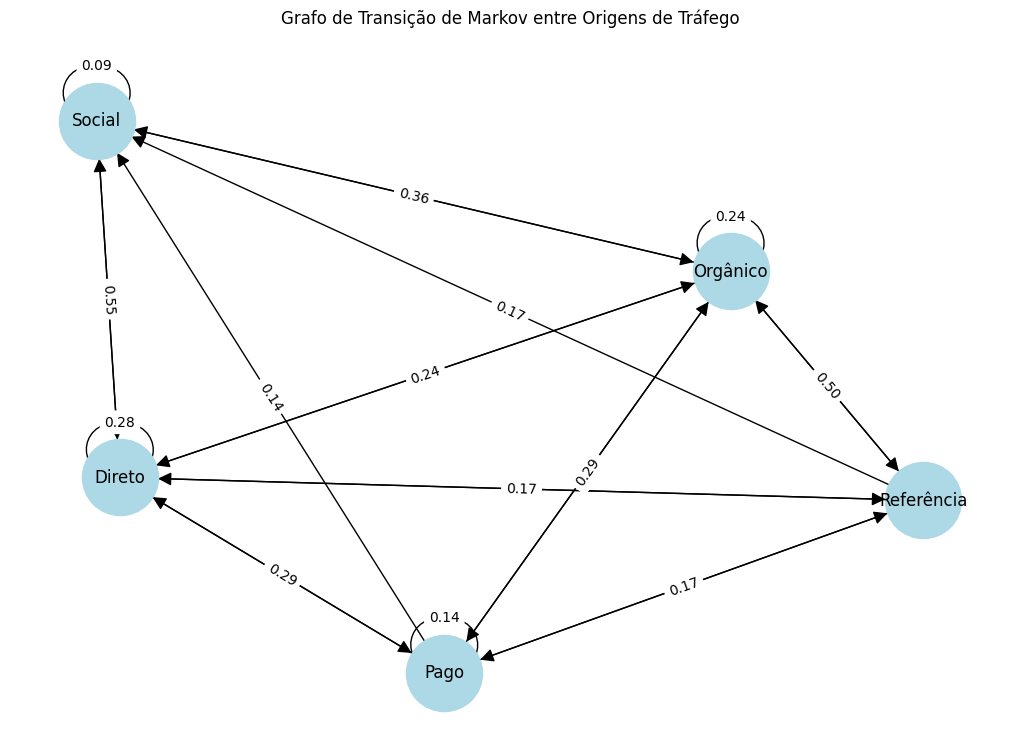

In [11]:
G = nx.DiGraph()

# Adiciona nós e arestas com pesos (probabilidades)
for origem in matriz_transicao.index:
    for destino in matriz_transicao.columns:
        peso = matriz_transicao.loc[origem, destino]
        if peso > 0:
            G.add_edge(origem, destino, weight=peso)

plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G, seed=42)
edges = G.edges(data=True)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', arrowsize=20)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d['weight']:.2f}" for u, v, d in edges})
plt.title("Grafo de Transição de Markov entre Origens de Tráfego")
plt.show()